# 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Read the Training & Testing Datasets

In [2]:
train_data= pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml?urp=gmail_link", skiprows=1)
test_data= pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml?urp=gmail_link", skiprows=1)
train_data= train_data[0]
test_data= test_data[0]

display("TRAINING DATASET:", train_data)
display("TESTING DATASET:", test_data)


'TRAINING DATASET:'

,1,x,y
0,2,24.0,21.549452
1,3,50.0,47.464463
2,4,15.0,17.218656
3,5,38.0,36.586398
4,6,87.0,87.288984
...,...,...,...
695,697,58.0,58.595006
696,698,93.0,94.625094
697,699,82.0,88.603770
698,700,66.0,63.648685


'TESTING DATASET:'

,1,x,y
0,2,77,79.775152
1,3,21,23.177279
2,4,22,25.609262
3,5,20,17.857388
4,6,36,41.849864
...,...,...,...
295,297,71,68.545888
296,298,46,47.334876
297,299,55,54.090637
298,300,62,63.297171


In [12]:
train_data= train_data.iloc[1:]
test_data= test_data.iloc[1:]

train_data = train_data.dropna(subset=['y'])
test_data = test_data.dropna(subset=['y'])


x_train= train_data['x'].values.reshape(-1,1)
x_test= test_data['x'].values.reshape(-1,1)

y_train= train_data['y'].values
y_test= test_data['y'].values

# x_train and x_test Data Values

In [4]:
x_train

array([[ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 24.],
       [  

In [5]:
x_test

array([[ 21],
       [ 22],
       [ 20],
       [ 36],
       [ 15],
       [ 62],
       [ 95],
       [ 20],
       [  5],
       [  4],
       [ 19],
       [ 96],
       [ 62],
       [ 36],
       [ 15],
       [ 65],
       [ 14],
       [ 87],
       [ 69],
       [ 89],
       [ 51],
       [ 89],
       [ 27],
       [ 97],
       [ 58],
       [ 79],
       [ 21],
       [ 93],
       [ 27],
       [ 99],
       [ 31],
       [ 33],
       [ 80],
       [ 28],
       [ 47],
       [ 53],
       [ 69],
       [ 28],
       [ 33],
       [ 91],
       [ 71],
       [ 50],
       [ 76],
       [  4],
       [ 37],
       [ 70],
       [ 68],
       [ 40],
       [ 35],
       [ 94],
       [ 88],
       [ 52],
       [ 31],
       [ 59],
       [  0],
       [ 39],
       [ 64],
       [ 69],
       [ 57],
       [ 13],
       [ 72],
       [ 76],
       [ 61],
       [ 82],
       [ 18],
       [ 41],
       [ 50],
       [ 55],
       [ 13],
       [ 46],
       [ 13],
      

# y_train Data Values

In [6]:
y_train

array([ 47.46446305,  17.21865634,  36.58639803,  87.28898389,
        32.46387493,  10.78089683,  80.7633986 ,  24.61215147,
         6.96331907,  11.23757338,  13.53290206,  24.60323899,
        39.40049976,  48.43753838,  61.69900319,  26.92832418,
        70.4052055 ,  29.34092408,  25.30895192,  69.02934339,
        84.99484703,  57.04310305,  50.5921991 ,  83.02772202,
        57.05752706,  47.95883341,  24.34226432,  94.68488281,
        48.03970696,   7.08132338,  21.99239907,  42.33151664,
         0.32908944,  61.92303698,  91.17716423,  39.45358014,
         5.99606961,  22.59015942,  61.18044414,  85.02778957,
        -1.28631089,  61.94273962,  21.96033347,  33.66194193,
        17.60946242,  58.5630564 ,  52.82390762,  22.1363481 ,
        35.07467353,  86.18822311,  42.63227697,   4.09817744,
        61.2229864 ,  17.70677576,  11.85312574,  80.23051695,
        62.64931741,   9.6168598 ,  20.02797699,  61.7510743 ,
        71.61010303,  23.77154623,  51.90142035,  22.66

# 3. Creating and Training a Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

# 4. Using Trained Data to make predictions on Test Data

In [14]:
predictions = lr_model.predict(x_test)
predictions

array([ 2.19170460e+01,  1.99159440e+01,  3.59247603e+01,  1.49131889e+01,
        6.19390869e+01,  9.49572705e+01,  1.99159440e+01,  4.90767868e+00,
        3.90712766e+00,  1.89153930e+01,  9.59578216e+01,  6.19390869e+01,
        3.59247603e+01,  1.49131889e+01,  6.49407399e+01,  1.39126379e+01,
        8.69528624e+01,  6.89429440e+01,  8.89539644e+01,  5.09330256e+01,
        8.89539644e+01,  2.69198011e+01,  9.69583726e+01,  5.79368828e+01,
        7.89484542e+01,  2.09164950e+01,  9.29561685e+01,  2.69198011e+01,
        9.89594746e+01,  3.09220052e+01,  3.29231073e+01,  7.99490052e+01,
        2.79203522e+01,  4.69308215e+01,  5.29341277e+01,  6.89429440e+01,
        2.79203522e+01,  3.29231073e+01,  9.09550664e+01,  7.09440460e+01,
        4.99324746e+01,  7.59468011e+01,  3.90712766e+00,  3.69253113e+01,
        6.99434950e+01,  6.79423930e+01,  3.99269644e+01,  3.49242093e+01,
        9.39567195e+01,  8.79534134e+01,  5.19335766e+01,  3.09220052e+01,
        5.89374338e+01, -

# y_test Data Values

In [9]:
y_test

array([ 23.17727887,  25.60926156,  17.85738813,  41.84986439,
         9.80523488,  58.87465933,  97.61793701,  18.39512747,
         8.74674765,   2.81141583,  17.09537241,  95.14907176,
        61.38800663,  40.24701716,  14.82248589,  66.95806869,
        16.63507984,  90.65513736,  77.22982636,  92.11906278,
        46.91387709,  89.82634442,  21.71380347,  97.41206981,
        57.01631363,  78.31056542,  19.1315097 ,  93.03483388,
        26.59112396,  97.55155344,  31.43524822,  35.12724777,
        78.61042432,  33.07112825,  51.69967172,  53.62235225,
        69.46306072,  27.42497237,  36.34644189,  95.06140858,
        68.16724757,  50.96155532,  78.04237454,   5.60766487,
        36.11334779,  67.2352155 ,  65.01324035,  38.14753871,
        34.31141446,  95.28503937,  87.84749912,  54.08170635,
        31.93063515,  59.61247085,  -1.04011421,  47.49374765,
        62.60089773,  70.9146434 ,  56.14834113,  14.05572877,
        68.11367147,  75.59701346,  59.225745  ,  85.45

# 5. Evaluation of the model- Mean Squared Error & R Squared Score

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mean_sqr = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mean_sqr)

r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

Mean Squared Error: 9.449950198763846
R-squared: 0.9887849312459578


# 6. Visualisation of the Predicted Output

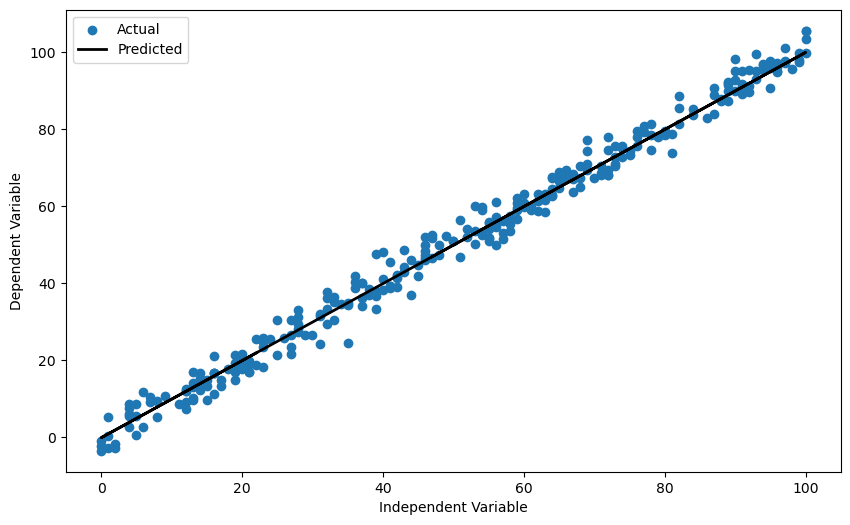

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, label='Actual')
plt.plot(x_test, predictions, linewidth=2, color= 'black', label='Predicted')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()